## PACT 4.2 - K-Means Clustering & Louvain Community Detection

For our PACT project, we planned to implement an unsupervised machine learning in order to automatically classify our users based on 3 criteria : total number of parties (party_nb), interactions with other user (social_score), and the alcohol intake(alcohol_unit). 

#### Recap from last meeting with our expert : 
1. Try Louvain to classify the users by their interactions.  
2. Try K-Means to classify the users by certain criteria. 

`This notebook contains 2 parts : Clustering K-Means & Louvain Community Detection`

#### K-Means Explanation : 
1. First of all, I have generated a CSV file that contains 200 users (they are all random value as we couldn't find time to hold a party :( ). 
2. I packed the data into a panda dataframe. 
3. Then, I decide the number of clusters based on the "ELBOW". 
4. Finally, I use scikit-learn K-Means library to for clustering. 

#### Louvain Community Detection  Explanation : 
1. Firstly, I generate a 2-dimensionnal matrix to represent the interaction. 
2. Then, I draw a graph based on the matrix. 
3. Finally, I calculate the partition. 

## K-Means 

In [16]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

### Read the CSV 
This will be replace by the Android Application Database during integration.

In [17]:
dataset1 = pd.read_csv('./pact.csv', delimiter=';',names=['party_nb', 'social_score', 'alcohol_unit'])
dataset1.head()

,,party_nb,social_score,alcohol_unit
1,JoeIng,30,"0,123893039",2
2,Bernard,56,"0,707285916",12
3,Thomas,41,"0,735162233",25
4,Petit,11,"0,443041305",8
5,Robert,20,"0,481910074",25


### Show the type and shape of dataset
We have 200 users and 3 features in the dataset.
The datatype is a Panda DataFrame.

In [18]:
print(dataset1.shape)
type(dataset1)

(200, 3)


pandas.core.frame.DataFrame

In [19]:
number = preprocessing.LabelEncoder()
dataset1['party_nb'] = number.fit_transform(dataset1['party_nb'])
dataset1=dataset1.fillna(-999) # fill holes with default value
#print(dataset1.describe(include='all'))
dataset1['social_score'] = number.fit_transform(dataset1['social_score'])
dataset1=dataset1.fillna(-999) # fill holes with default value
#print(dataset1.describe(include='all'))
dataset1['alcohol_unit'] = number.fit_transform(dataset1['alcohol_unit'])
dataset1=dataset1.fillna(-999) # fill holes with default value
#print(dataset1.describe(include='all'))
dataset1.describe()

dataset1_standardized = preprocessing.scale(dataset1)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

### Find the appropriate cluster number by the elbow method
We see that 2 or 3 is the optimal number of clusters.

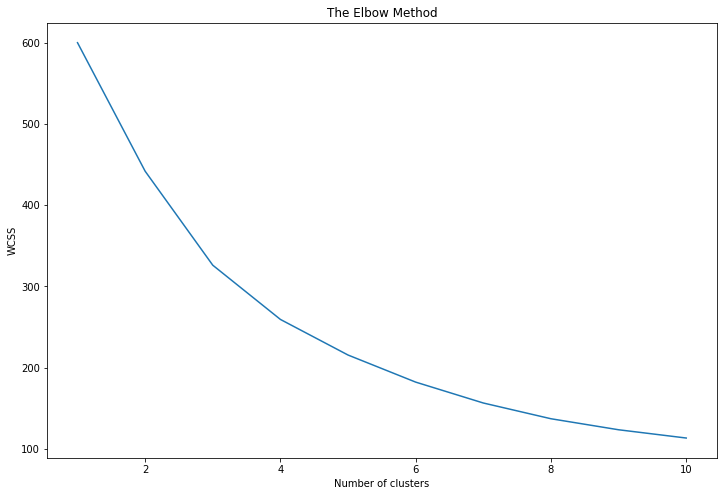

In [20]:
# find the appropriate cluster number
plt.figure(figsize=(12, 8))
wcss = [] #summation of the each clusters distance between that specific clusters each points against the cluster centroid
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting K-Means to the dataset

In [21]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataset1_standardized)
kmeans.predict(dataset1_standardized)
labels = kmeans.labels_
print(len(labels))
dataset1['Class'] = labels 
dataset1

200


,,party_nb,social_score,alcohol_unit,Class
1,JoeIng,29,24,2,1
2,Bernard,55,138,12,3
3,Thomas,40,141,25,3
4,Petit,11,95,8,0
5,Robert,19,102,25,2
...,...,...,...,...,...
196,Lamy,11,182,17,0
197,Delaunay,18,84,0,1
198,Pasquier,23,172,21,3
199,Carlier,45,66,11,1


## Louvain Community Detection

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import community 
import numpy as np

### Generate my data (Friends) in matrix form
We generate 10 users to test and randomly set the value of matrix (1=friend ; 0=not friend)

In [23]:
matrix = np.zeros( (10, 10) )
print("Size of matrix : ", len(matrix))

for i in range (len(matrix)):
     for j in range(len(matrix)):
        matrix[i, i] = 0 #can't be friend with yourself
        matrix[i, j] = np.random.randint(low=0, high=2) #randomly be friends with someone else 
        
print(matrix)

Size of matrix :  10
[[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]]


### Draw the graph from the matrix

Number of nodes :  10


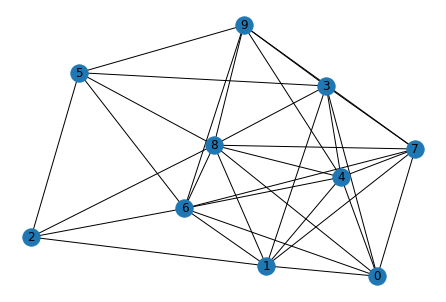

In [26]:
graphPACT = nx.Graph()

for i in range (len(matrix)):
     for j in range(len(matrix)):
            if(matrix[i,j] == 1):
                graphPACT.add_edges_from([(i, j)])

print("Number of nodes : ",graphPACT.number_of_nodes())

nx.draw(graphPACT, with_labels=True)
plt.show;

### Compute the best partition

In [25]:
partitionPACT = community.best_partition(graphPACT)

for k in partitionPACT :
    print("Community of ",k ," : ", partitionPACT[k])
    
#print(partitionPACT)

Community of  0  :  0
Community of  6  :  0
Community of  8  :  1
Community of  1  :  0
Community of  3  :  1
Community of  4  :  0
Community of  7  :  0
Community of  2  :  1
Community of  5  :  1
Community of  9  :  1
